In [1]:
from sklearn.datasets import load_iris
dataSet = load_iris()
data = dataSet['data'] # 数据
label = dataSet['target'] # 数据对应的标签
feature = dataSet['feature_names'] # 特征的名称
target = dataSet['target_names'] # 标签的名称
print(target)

['setosa' 'versicolor' 'virginica']


In [3]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.column_stack((data,label)),columns = np.append(feature,'label'))
df.head()# 查看前五行数据 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
df.isnull().sum(axis=0).sort_values(ascending=False)/float(len(df))# 检查缺失值比例 

sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
label                0.0
dtype: float64

In [5]:
df['label'].value_counts() # 检查数据类别的比例 

0.0    50
1.0    50
2.0    50
Name: label, dtype: int64

In [6]:
#Sep🤣🤣

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: label, Length: 150, dtype: float64


In [7]:
from sklearn.preprocessing import StandardScaler
StandardScaler().fit_transform(data)

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
ss = ShuffleSplit(n_splits = 1,test_size= 0.2) # 按比例拆分数据，80%用作训练
for tr,te in ss.split(data,label):
    xr = data[tr]
    xe = data[te]
    yr = label[tr]
    ye = label[te]
    clf = LogisticRegression(solver = 'lbfgs',multi_class = 'multinomial') 
    clf.fit(xr,yr)
    predict = clf.predict(xe)
    print(classification_report(ye, predict)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.88      0.93         8
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



D:\Software\anacoda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
from sklearn import preprocessing

X = [['male', 'from US', 'uses Coinbase'], ['female', 'from UK', 'uses Binance']]
encode = preprocessing.OrdinalEncoder()
encode.fit(X)

encode.transform([['male', 'from UK', 'uses Coinbase']])

array([[1., 0., 1.]])

In [15]:
scaler = preprocessing.StandardScaler()
X = np.random.rand(3,4)
X

array([[0.69106659, 0.28388427, 0.50669572, 0.87119302],
       [0.37354597, 0.99883581, 0.47229339, 0.11839814],
       [0.93355645, 0.33995304, 0.08421271, 0.0212642 ]])

In [16]:
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.10906919, -0.79170632,  0.79499565,  1.40648569],
       [-1.27563161,  1.41069346,  0.61541207, -0.57538161],
       [ 1.16656243, -0.61898713, -1.41040771, -0.83110409]])

In [17]:
norm = preprocessing.Normalizer()

X_norm = norm.transform(X)
X_norm

array([[0.55085073, 0.22628479, 0.40388829, 0.69442992],
       [0.3186435 , 0.85203044, 0.40287737, 0.1009964 ],
       [0.93606864, 0.34086785, 0.08443933, 0.02132142]])

# from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Create a random dataset
X, y = make_blobs(n_samples=1500)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

print(f'X training set {X_train.shape}\nX testing set {X_test.shape}\ny training set {y_train.shape}\ny testing set {y_test.shape}')

# 导入 sklearn 波士顿房价数据集，这样我们就可以根据房屋的年龄 (AGE) 和房间数量 (RM) 来预测房屋中位值 (MEDV)。

请记住，这称为多元线性回归，因为我们使用两个特征。


In [19]:
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

# Load the Boston dataset
boston = datasets.load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
# Add the target variable (label)
df['MEDV'] = boston.target
df.head()

D:\Software\anacoda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# 现在我们将设置特征 (X) 和标签 (y)。请注意我们如何使用 numpynp.c_函数来连接数据

In [20]:
# Set the features and label
X = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
y = df['MEDV']

In [22]:
# Set the features and label
X = pd.DataFrame(np.c_[df['AGE'], df['RM']], columns = ['AGE','RM'])
y = df['MEDV']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 2) (102, 2) (404,) (102,)


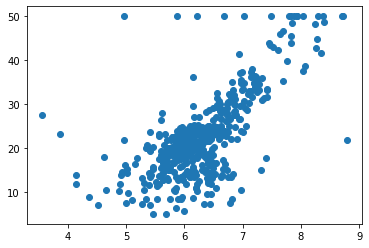

In [23]:
# Plot the features
plt.scatter(X['RM'], y)

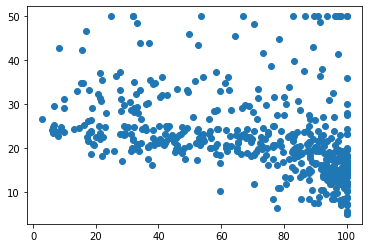

In [24]:
plt.scatter(X['AGE'], y)

In [25]:
regressor = linear_model.LinearRegression()
model = regressor.fit(X_train, y_train)

print('Coefficient of determination:', model.score(X, y))
print('Intercept:', model.intercept_)
print('slope:', model.coef_)

Coefficient of determination: 0.5292691713568779
Intercept: -28.203538066489088
slope: [-0.06640957  8.7957305 ]


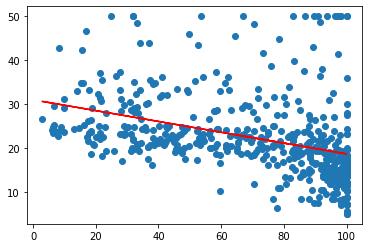

In [26]:
plt.plot(X['AGE'], y, 'o')
model.coef_[0], model.intercept_ = np.polyfit(X['AGE'], y, 1)
plt.plot(X['AGE'], model.coef_[0]*X['AGE']+model.intercept_, color='red')

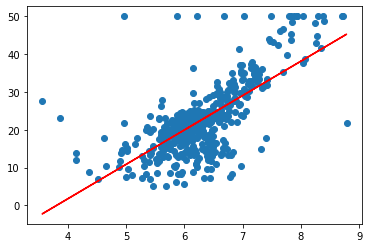

In [27]:
# Room number regression line
plt.plot(X['RM'], y, 'o')
model.coef_[0], model.intercept_ = np.polyfit(X['RM'], y, 1)
plt.plot(X['RM'], model.coef_[0]*X['RM']+model.intercept_, color='red')

In [43]:
y_test_predict = regressor.predict(X_test)
print('predicted response:', y_test_predict, sep='\n')
print('test:', y_test, sep='\n')

predicted response:
[ -9943.59330148  -2948.04674547 -11955.02518712    473.8405134
 -10996.25221616  -8633.69736353  -9825.09304385 -11243.1655197
 -10846.6200083   -9346.09357051 -11272.4415708  -10193.04857115
 -12131.78975571  -5793.39203129  -8611.40512246  -7685.17774645
 -11546.22089527 -12128.614497    -2815.30620015 -11939.59114797
   -685.49086926  -2841.21595434 -11315.50685944  -7893.44121807
 -11476.81732953 -11495.56735909  -3461.14233022 -11306.57919298
 -11040.18828212  -8105.32853065 -10551.93816817  -5600.48343726
 -11820.41115121 -11605.39749432 -11367.58530397 -11916.4633125
  -6795.65001808  -4785.9445635   -6532.3640001     693.9405704
  -8422.99994244  -8055.07713019  -2800.25037741  -3490.91973795
  -7485.27021882 -11711.56860567 -11438.52812255    640.82422967
  -9932.12613679  -7360.96477905  -9783.28554467  -3533.46361062
 -10983.95825279  -8192.24825581  -5632.27259939  -5546.85694416
 -12116.83701385  -2264.27570553  -5013.54491074  -8052.36171734
  -4382.0

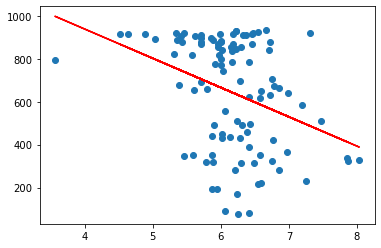

In [37]:
plt.plot(X_test['RM'], y_test_predict, 'o')
model.coef_[0], model.intercept_ = np.polyfit(X_test['RM'], y_test_predict, 1)
plt.plot(X_test['RM'], model.coef_[0]*X_test['RM']+model.intercept_, color='red')

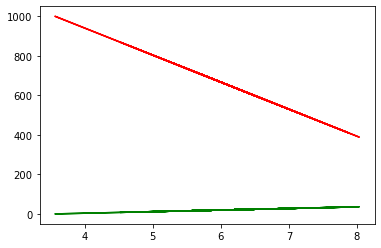

In [41]:
#plt.plot(X_test['RM'], y_test, 'o')
model.coef_[0], model.intercept_ = np.polyfit(X_test['RM'], y_test, 1)
plt.plot(X_test['RM'], model.coef_[0]*X_test['RM']+model.intercept_, color='green')
#plt.plot(X_test['RM'], y_test_predict, 'o')
model.coef_[0], model.intercept_ = np.polyfit(X_test['RM'], y_test_predict, 1)
plt.plot(X_test['RM'], model.coef_[0]*X_test['RM']+model.intercept_, color='red')

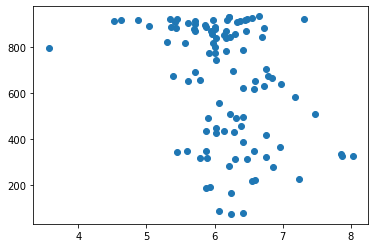

In [34]:
plt.plot(X_test['RM'], y_test_predict, 'o')

In [29]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# 训练数据：x_train
x_train = np.array([[1,2,3],
                    [1,3,4],
                    [2,1,2],
                    [4,5,6],
                    [3,5,3],
                    [1,7,2]])
# 训练标签：y_train
y_train = np.array([0, 0, 0, 1, 1, 1])

# 测试数据：x_test
x_test = np.array([[2,2,2],
                   [3,2,6],
                   [1,7,4]])
# 定义并训练LR模型
clf = LogisticRegression()
clf.fit(x_train, y_train)


LogisticRegression()

In [30]:
# 返回预测标签
clf.predict(x_test)
# array([1, 0, 1])


array([0, 0, 1])

In [31]:
# 返回预测属于某标签的概率
clf.predict_proba(x_test)
# array([[ 0.43348191, 0.56651809],
#        [ 0.84401838, 0.15598162],
#        [ 0.13147498, 0.86852502]])


array([[0.87394275, 0.12605725],
       [0.77045805, 0.22954195],
       [0.07048027, 0.92951973]])

In [44]:

sns.pairplot( iris_data, hue='species', palette='husl' );

NameError: name 'sns' is not defined